**TF-IDF**

using https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.fit_transfor
https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py

In [16]:
import os
import numpy as np
from time import time
from gensim import utils
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import minmax_scale, LabelEncoder, StandardScaler, Normalizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import k_means, SpectralClustering, KMeans
from sklearn.pipeline import make_pipeline
from sklearn import metrics

In [2]:
class Dataloader:
    def __iter__(self):
        for genre in ['ballads', 'elegies', 'songs', 'novels']:
            for file in os.listdir('../datasets/lemmatized/' + genre):
                with open('../datasets/lemmatized/' + genre + '/' + file, 'r', encoding='utf-8') as f:
                    yield utils.simple_preprocess(f.read()), genre
sentences = Dataloader()

texts = []
true_labels = []

for sent, genre in sentences:
    if not sent:
        continue
    texts. append(sent)
    true_labels.append(genre)

In [3]:
print(len(texts))
print(len(true_labels))

1826
1826


In [4]:
vectorizer = TfidfVectorizer(max_df=0.5, min_df=5)
X_tfidf = vectorizer.fit_transform([' '.join(x) for x in texts])

In [6]:
print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

n_samples: 1826, n_features: 62719


In [54]:
lsa = make_pipeline(TruncatedSVD(n_components=100), Normalizer(copy=False))
X_lsa = lsa.fit_transform(X_tfidf)
explained_variance = lsa[0].explained_variance_ratio_.sum()

print(f"Explained variance of the SVD step: {explained_variance * 100:.1f}%")

Explained variance of the SVD step: 29.6%


In [55]:
kmeans = KMeans(
    n_clusters=4,
    max_iter=100,
    n_init=1
    )
pred_labels = kmeans.fit_predict(X_lsa)
print('tf-idf weighting + truncated SVD to 100 components, clustering with k-means')
print(
f'''homogeneity_score: {metrics.homogeneity_score(true_labels, pred_labels):.4f}
completeness_score: {metrics.completeness_score(true_labels, pred_labels):.4f}
v_measure_score: {metrics.v_measure_score(true_labels, pred_labels):.4f}
adjusted_rand_score: {metrics.adjusted_rand_score(true_labels, pred_labels):.4f}
silhouette_score: {metrics.silhouette_score(X_lsa, pred_labels, sample_size=2000):.4f}'''
)

tf-idf weighting + truncated SVD to 100 components, clustering with k-means
homogeneity_score: 0.7635
completeness_score: 0.7277
v_measure_score: 0.7451
adjusted_rand_score: 0.7458
silhouette_score: 0.1410


In [56]:
lsa_50 = make_pipeline(TruncatedSVD(n_components=50), Normalizer(copy=False))
X_lsa_50 = lsa_50.fit_transform(X_tfidf)
pred_labels = kmeans.fit_predict(X_lsa_50)

print('tf-idf weighting + truncated SVD to 50 components, clustering with k-means')
print(
f'''homogeneity_score: {metrics.homogeneity_score(true_labels, pred_labels):.4f}
completeness_score: {metrics.completeness_score(true_labels, pred_labels):.4f}
v_measure_score: {metrics.v_measure_score(true_labels, pred_labels):.4f}
adjusted_rand_score: {metrics.adjusted_rand_score(true_labels, pred_labels):.4f}
silhouette_score: {metrics.silhouette_score(X_lsa, pred_labels, sample_size=2000):.4f}'''
)

tf-idf weighting + truncated SVD to 50 components, clustering with k-means
homogeneity_score: 0.7629
completeness_score: 0.7301
v_measure_score: 0.7461
adjusted_rand_score: 0.7651
silhouette_score: 0.1408


In [57]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(
    n_clusters=4, 
    n_neighbors=6,
    affinity='nearest_neighbors',
    assign_labels='kmeans',
)
pred_labels = clustering.fit_predict(minmax_scale(X_lsa))

print('tf-idf weighting + truncated SVD to 100 components, minmax scaling, clustering with spectral clustering')
print(
f'''homogeneity_score: {metrics.homogeneity_score(true_labels, pred_labels):.4f}
completeness_score: {metrics.completeness_score(true_labels, pred_labels):.4f}
v_measure_score: {metrics.v_measure_score(true_labels, pred_labels):.4f}
adjusted_rand_score: {metrics.adjusted_rand_score(true_labels, pred_labels):.4f}
silhouette_score: {metrics.silhouette_score(X_lsa, pred_labels, sample_size=2000):.4f}'''
)

tf-idf weighting + truncated SVD to 100 components, minmax scaling, clustering with spectral clustering
homogeneity_score: 0.2416
completeness_score: 0.4386
v_measure_score: 0.3115
adjusted_rand_score: 0.2807
silhouette_score: 0.0996


In [58]:
pred_labels = clustering.fit_predict(minmax_scale(X_lsa_50))

print('tf-idf weighting + truncated SVD to 50 components, minmax scaling, clustering with spectral clustering')
print(
f'''homogeneity_score: {metrics.homogeneity_score(true_labels, pred_labels):.4f}
completeness_score: {metrics.completeness_score(true_labels, pred_labels):.4f}
v_measure_score: {metrics.v_measure_score(true_labels, pred_labels):.4f}
adjusted_rand_score: {metrics.adjusted_rand_score(true_labels, pred_labels):.4f}
silhouette_score: {metrics.silhouette_score(X_lsa, pred_labels, sample_size=2000):.4f}'''
)

tf-idf weighting + truncated SVD to 50 components, minmax scaling, clustering with spectral clustering
homogeneity_score: 0.4006
completeness_score: 0.6305
v_measure_score: 0.4899
adjusted_rand_score: 0.3006
silhouette_score: -0.0069


In [65]:
graph_feat = pd.read_csv('graph_feat.csv')
graph_feat.shape

(1826, 42)

In [71]:
pca = PCA(n_components=16)
emb = pca.fit_transform(minmax_scale(np.concatenate((X_lsa_50, graph_feat), axis=1)))
pred_labels = clustering.fit_predict(emb)

print('tf-idf weighting + truncated SVD to 50 components matrix + graph stats, minmax scaling, PCA, spectral clustering')
print(
f'''homogeneity_score: {metrics.homogeneity_score(true_labels, pred_labels):.4f}
completeness_score: {metrics.completeness_score(true_labels, pred_labels):.4f}
v_measure_score: {metrics.v_measure_score(true_labels, pred_labels):.4f}
adjusted_rand_score: {metrics.adjusted_rand_score(true_labels, pred_labels):.4f}
silhouette_score: {metrics.silhouette_score(X_lsa, pred_labels, sample_size=2000):.4f}'''
)

tf-idf weighting + truncated SVD to 50 components matrix + graph stats, minmax scaling, PCA, spectral clustering
homogeneity_score: 0.5084
completeness_score: 0.5302
v_measure_score: 0.5191
adjusted_rand_score: 0.3921
silhouette_score: -0.0131


In [74]:
lsa_5 = make_pipeline(TruncatedSVD(n_components=5), Normalizer(copy=False))
X_lsa_5 = lsa_5.fit_transform(X_tfidf)
pca = PCA(n_components=16)
emb = pca.fit_transform(minmax_scale(np.concatenate((X_lsa_5, graph_feat), axis=1)))
pred_labels = clustering.fit_predict(emb)

print('tf-idf weighting + truncated SVD to 5 components matrix + graph stats, minmax scaling, PCA, spectral clustering')
print(
f'''homogeneity_score: {metrics.homogeneity_score(true_labels, pred_labels):.4f}
completeness_score: {metrics.completeness_score(true_labels, pred_labels):.4f}
v_measure_score: {metrics.v_measure_score(true_labels, pred_labels):.4f}
adjusted_rand_score: {metrics.adjusted_rand_score(true_labels, pred_labels):.4f}
silhouette_score: {metrics.silhouette_score(X_lsa, pred_labels, sample_size=2000):.4f}'''
)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


tf-idf weighting + truncated SVD to 5 components matrix + graph stats, minmax scaling, PCA, spectral clustering
homogeneity_score: 0.5032
completeness_score: 0.5257
v_measure_score: 0.5142
adjusted_rand_score: 0.3822
silhouette_score: 0.0008


Decision trees

In [42]:
graph_feat = pd.read_csv('graph_feat.csv')

In [43]:
graph_feat_ = graph_feat.drop(columns='text_len')

In [94]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(graph_feat.drop(columns='text_len'), LabelEncoder().fit_transform(true_labels))

DecisionTreeClassifier(random_state=0)

In [95]:
feat_importance = clf.feature_importances_

In [96]:
pd.DataFrame({
    'features': clf.feature_names_in_,
    'importance': clf.feature_importances_
    })

,features,importance
0,core_edges,0.000763
1,multiple_edges,0.006583
2,boundary_edges,0.000763
3,multiple_nodes,0.011829
4,boundary_nodes,0.017278
5,min_core_node_weight,0.015478
6,max_core_node_weight,0.014885
7,avg_core_node_weight,0.113023
8,sum_core_node_weight,0.022110
9,min_multiple_node_weight,0.391636


In [86]:
pd.Series(feat_importance, index=graph_feat.columns)

text_len                    0.389939
core_edges                  0.007565
multiple_edges              0.000000
boundary_edges              0.003124
multiple_nodes              0.006075
boundary_nodes              0.007296
min_core_node_weight        0.015855
max_core_node_weight        0.016450
avg_core_node_weight        0.113781
sum_core_node_weight        0.021406
min_multiple_node_weight    0.001525
max_multiple_node_weight    0.016350
avg_multiple_node_weight    0.012824
sum_multiple_node_weight    0.007681
min_boundary_node_weight    0.003166
max_boundary_node_weight    0.025037
avg_boundary_node_weight    0.014379
sum_boundary_node_weight    0.016120
min_core_edge_weight        0.021438
max_core_edge_weight        0.016251
avg_core_edge_weight        0.031786
sum_core_edge_weight        0.010129
min_multiple_edge_weight    0.024716
max_multiple_edge_weight    0.023628
avg_multiple_edge_weight    0.020994
sum_multiple_edge_weight    0.024711
min_boundary_edge_weight    0.023747
m

In [47]:
graph_feat_.iloc[0]

core_edges                  21.000000
multiple_edges              37.000000
boundary_edges              24.000000
multiple_nodes              11.000000
boundary_nodes              24.000000
min_core_node_weight         0.023041
max_core_node_weight         0.036866
avg_core_node_weight         0.029032
sum_core_node_weight         0.290323
min_multiple_node_weight     0.004608
max_multiple_node_weight     0.009217
avg_multiple_node_weight     0.007122
sum_multiple_node_weight     0.078341
min_boundary_node_weight     0.004608
max_boundary_node_weight     0.023041
avg_boundary_node_weight     0.007680
sum_boundary_node_weight     0.184332
min_core_edge_weight         0.732022
max_core_edge_weight         0.958177
avg_core_edge_weight         0.856555
sum_core_edge_weight        17.987651
min_multiple_edge_weight     0.404699
max_multiple_edge_weight     0.862086
avg_multiple_edge_weight     0.733216
sum_multiple_edge_weight    27.128985
min_boundary_edge_weight     0.380254
max_boundary

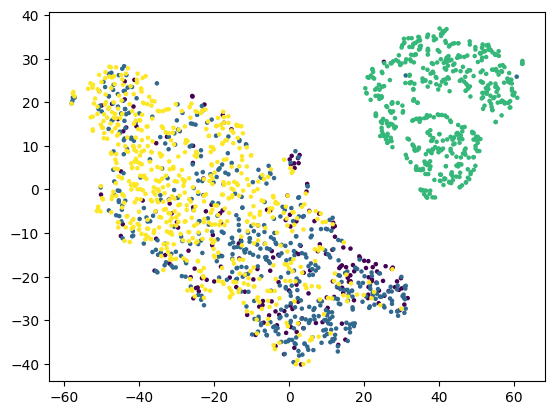

In [48]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
emb = tsne.fit_transform(minmax_scale(graph_feat_))
plt.scatter(emb[:, 0], emb[:, 1], c=LabelEncoder().fit_transform(true_labels), s=5)

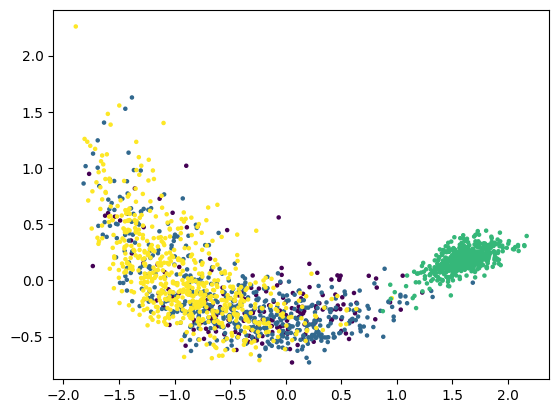

In [44]:
pca = PCA(n_components=16)
emb = pca.fit_transform(minmax_scale(graph_feat_))
plt.scatter(emb[:, 0], emb[:, 1], c=LabelEncoder().fit_transform(true_labels), s=5)

In [45]:
clustering = SpectralClustering(
    n_clusters=4, 
    n_neighbors=6,
    affinity='nearest_neighbors',
    assign_labels='kmeans',
)
pred_labels = clustering.fit_predict(emb)

In [46]:
print(
f'''homogeneity_score: {metrics.homogeneity_score(true_labels, pred_labels):.4f}
completeness_score: {metrics.completeness_score(true_labels, pred_labels):.4f}
v_measure_score: {metrics.v_measure_score(true_labels, pred_labels):.4f}
adjusted_rand_score: {metrics.adjusted_rand_score(true_labels, pred_labels):.4f}'''
)

homogeneity_score: 0.4826
completeness_score: 0.4939
v_measure_score: 0.4882
adjusted_rand_score: 0.3423


Plots

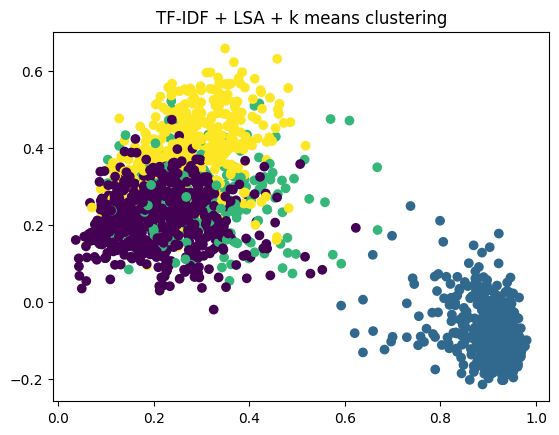

In [15]:
import matplotlib.pyplot as plt

x = X_lsa[:, 0]
y = X_lsa[:, 1]

plt.scatter(x, y, c=kmeans.labels_)
plt.title('TF-IDF + LSA + k means clustering')
plt.show()

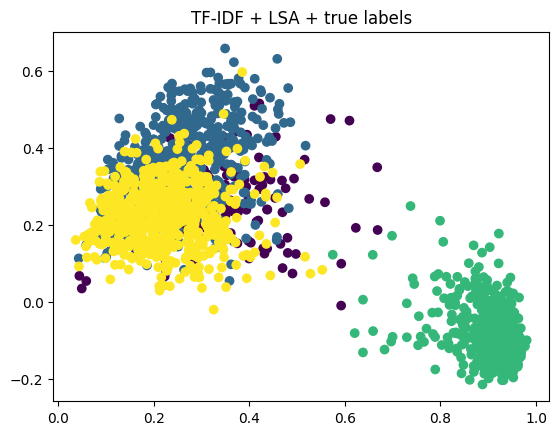

In [17]:
from sklearn.preprocessing import LabelEncoder

x = X_lsa[:, 0]
y = X_lsa[:, 1]

plt.scatter(x, y, c=LabelEncoder().fit_transform(true_labels))
plt.title('TF-IDF + LSA + true labels')
plt.show()

In [15]:
spectral = SpectralClustering(n_clusters=4, assign_labels='discretize', n_neighbors=3).fit(X_lsa)
labels_predict=spectral.labels_.tolist()

In [16]:
from sklearn import metrics

print("Homogeneity:", metrics.homogeneity_score(true_labels, spectral.labels_))
print("Completeness:", metrics.completeness_score(true_labels, spectral.labels_))
print("V-measure:", metrics.v_measure_score(true_labels, spectral.labels_))
print("Adjusted Rand-Index:", metrics.adjusted_rand_score(true_labels, spectral.labels_))
print("Silhouette Coefficient:", metrics.silhouette_score(spectral.affinity_matrix_, spectral.labels_, sample_size=2000))

Homogeneity: 0.6045289675370284
Completeness: 0.5913950981986699
V-measure: 0.5978899135215046
Adjusted Rand-Index: 0.614989268013866
Silhouette Coefficient: 0.09979604411798937


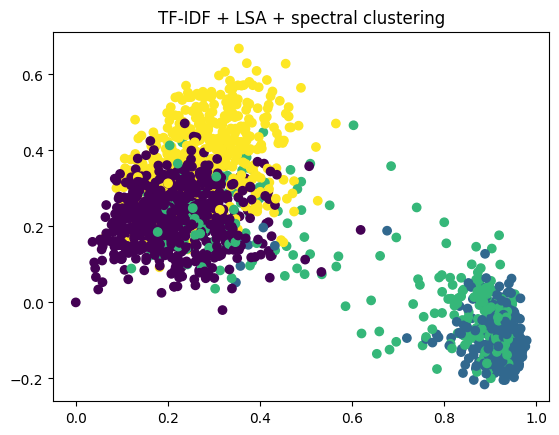

In [17]:
x = X_lsa[:, 0]
y = X_lsa[:, 1]

plt.scatter(x, y, c=spectral.labels_)
plt.title('TF-IDF + LSA + spectral clustering')
plt.show()

**TF-IDF based clustering with authors**

In [4]:
class Dataloader:
    def __iter__(self):
        for genre in ['ballads', 'elegies', 'songs', 'novels']:
            for file in os.listdir('../datasets/lemmatized/' + genre):
                with open('../datasets/lemmatized/' + genre + '/' + file, 'r', encoding='utf-8') as f:
                    fname = '../datasets/lemmatized/' + genre + '/' + file
                    if genre == 'novels':
                        author = file.split('.')[0]
                    elif genre == 'ballads':
                        author = file.split('_')[2]
                    else:
                        author = file.split('_')[1]
                    yield utils.simple_preprocess(f.read()), genre, author, fname
sentences = Dataloader()

fnames = []
texts = []
true_labels = []
authors = []

for (sent, genre, author, fname) in sentences:
    if not sent:
        continue
    texts. append(sent)
    true_labels.append(genre)
    authors.append(author)
    fnames.append(fname)

In [5]:
authors_ = []
for author in authors:
    if author.endswith('.txt'):
        author = author[:-4]
    authors_.append(author)

In [6]:
from collections import Counter

print(Counter(authors).most_common(11))
print(Counter(authors_).most_common(11))

[('kolcov', 57), ('cyganov', 47), ('suhanov', 37), ('Batushkov', 26), ('leskov', 26), ('Pushkin', 22), ('Unknown', 22), ('Baratynskij', 21), ('Jazykov', 21), ('Glebov', 20), ('bp', 18)]
[('kolcov', 57), ('cyganov', 47), ('suhanov', 37), ('Batushkov', 28), ('Glebov', 26), ('leskov', 26), ('Jazykov', 23), ('Pushkin', 22), ('Unknown', 22), ('Baratynskij', 21), ('MDmitriev', 18)]


In [7]:
selected_authors = [i[0] for i in Counter(authors_).most_common(11) if i[0] != 'Unknown']

In [8]:
true_authors = [author for author in authors if author in selected_authors]
indeces = [num for num, author in enumerate(authors) if author in selected_authors]
selected_files = [fnames[num] for num in indeces]

In [9]:
vectorizer = TfidfVectorizer(input='filename', max_df=0.5, min_df=5)
X_tfidf = vectorizer.fit_transform(selected_files)

In [23]:
print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

n_samples: 294, n_features: 10578


In [24]:
lsa = make_pipeline(TruncatedSVD(n_components=100), Normalizer(copy=False))
X_lsa = lsa.fit_transform(X_tfidf)

In [25]:
unique_labels, category_sizes = np.unique(true_authors, return_counts=True)
true_k = unique_labels.shape[0]

In [27]:
kmeans = KMeans(
    n_clusters=true_k,
    max_iter=100,
    n_init=1
    )
pred_labels = kmeans.fit_predict(X_lsa)
print(
f'''homogeneity_score: {metrics.homogeneity_score(true_authors, pred_labels):.4f}
completeness_score: {metrics.completeness_score(true_authors, pred_labels):.4f}
v_measure_score: {metrics.v_measure_score(true_authors, pred_labels):.4f}
adjusted_rand_score: {metrics.adjusted_rand_score(true_authors, pred_labels):.4f}
silhouette_score: {metrics.silhouette_score(X_lsa, pred_labels, sample_size=2000):.4f}'''
)

homogeneity_score: 0.4407
completeness_score: 0.4417
v_measure_score: 0.4412
adjusted_rand_score: 0.2808
silhouette_score: 0.0576


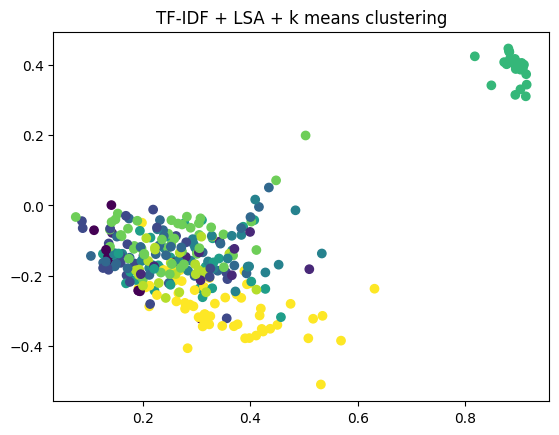

In [18]:
x = X_lsa[:, 0]
y = X_lsa[:, 1]

plt.scatter(x, y, c=kmeans.labels_)
plt.title('TF-IDF + LSA + k means clustering')
plt.show()

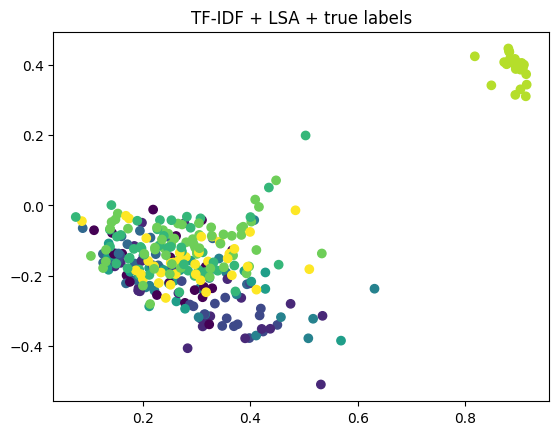

In [19]:
x = X_lsa[:, 0]
y = X_lsa[:, 1]

plt.scatter(x, y, c=LabelEncoder().fit_transform(true_authors))
plt.title('TF-IDF + LSA + true labels')
plt.show()

In [20]:
spectral = SpectralClustering(n_clusters=true_k).fit(X_lsa)

In [21]:
print("Homogeneity:", metrics.homogeneity_score(true_authors, spectral.labels_))
print("Completeness:", metrics.completeness_score(true_authors, spectral.labels_))
print("V-measure:", metrics.v_measure_score(true_authors, spectral.labels_))
print("Adjusted Rand-Index:", metrics.adjusted_rand_score(true_authors, spectral.labels_))
print("Silhouette Coefficient:", metrics.silhouette_score(spectral.affinity_matrix_, spectral.labels_, sample_size=2000))

Homogeneity: 0.4381147472124273
Completeness: 0.4676098006359517
V-measure: 0.4523820185427254
Adjusted Rand-Index: 0.2584685240181341
Silhouette Coefficient: 0.11587357804745266


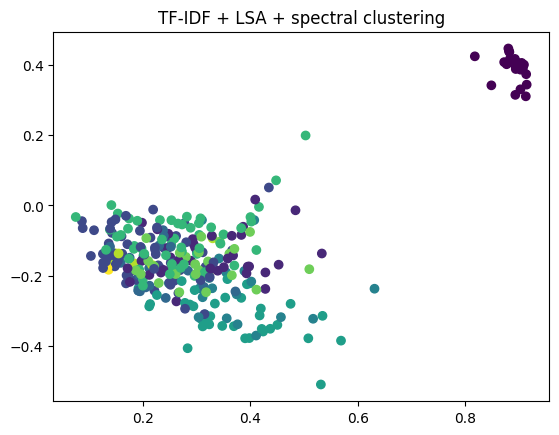

In [22]:
x = X_lsa[:, 0]
y = X_lsa[:, 1]

plt.scatter(x, y, c=spectral.labels_)
plt.title('TF-IDF + LSA + spectral clustering')
plt.show()

author attribution for novels with TF-IDF

In [28]:
novels = [num for num, genre in enumerate(true_labels) if genre == 'novels']

In [31]:
novels_text = [text for num, text in enumerate(texts) if num in novels]
novels_authors = [text for num, text in enumerate(authors) if num in novels]

In [35]:
print(len(novels_text))
print(len(set(novels_authors)))

506
153


In [37]:
selected_authors = [i[0] for i in Counter(novels_authors).most_common(10)]

In [38]:
true_authors = [author for author in authors if author in selected_authors]
indeces = [num for num, author in enumerate(authors) if author in selected_authors]
selected_files = [fnames[num] for num in indeces]

In [39]:
vectorizer = TfidfVectorizer(input='filename', max_df=0.5, min_df=5)
X_tfidf = vectorizer.fit_transform(selected_files)
lsa = make_pipeline(TruncatedSVD(n_components=100), Normalizer(copy=False))
X_lsa = lsa.fit_transform(X_tfidf)

In [40]:
kmeans = KMeans(
    n_clusters=10,
    max_iter=100,
    n_init=1
    )
pred_labels = kmeans.fit_predict(X_lsa)
print(
f'''homogeneity_score: {metrics.homogeneity_score(true_authors, pred_labels):.4f}
completeness_score: {metrics.completeness_score(true_authors, pred_labels):.4f}
v_measure_score: {metrics.v_measure_score(true_authors, pred_labels):.4f}
adjusted_rand_score: {metrics.adjusted_rand_score(true_authors, pred_labels):.4f}
silhouette_score: {metrics.silhouette_score(X_lsa, pred_labels, sample_size=2000):.4f}'''
)

homogeneity_score: 0.2468
completeness_score: 0.2676
v_measure_score: 0.2568
adjusted_rand_score: 0.0525
silhouette_score: 0.0314
